# Deconvolution of bulk RNAseq

In [23]:
# Load libraries
library(DWLS)
library(dplyr)
library(data.table)
library(pheatmap)
library(ggplotify)
library(purrr)
library(ggpubr)
library(MatrixGenerics)
library(ggh4x)
library(RColorBrewer)
library(stringr)
library(Seurat)
library(edgeR) # v3.38.4
library(pheatmap)
library(data.table)
library(dplyr)
library(tidyverse)
library(ggalluvial)

## Step 1 : Preparation of SingleNuclei data

In [2]:
## Step 1 : Load the single cell matrix 

# Load the post processing object 
species = "MousePseudopregnant"
outdir = "../../../results/snRNA-seq/"
sobj = readRDS(file = paste0(outdir, "seuratobject/",species,"_processed.rds"))
sobj

An object of class Seurat 
74760 features across 20551 samples within 2 assays 
Active assay: soupx (37380 features, 2000 variable features)
 10 layers present: counts.MousePseudopregnant_PP01, counts.MousePseudopregnant_PP02, counts.MousePseudopregnant_PP03, data.MousePseudopregnant_PP01, scale.data.MousePseudopregnant_PP01, data.MousePseudopregnant_PP02, scale.data.MousePseudopregnant_PP02, data.MousePseudopregnant_PP03, scale.data.MousePseudopregnant_PP03, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap.unintegrated, umap

In [5]:
table(sobj$Manual_annotation)


                       Stromal             Epithelial_Luminal 
                         10069                           2977 
Epithelial_Glandular_Secretory                         Immune 
                          2805                           1646 
                    Myometrial                    Endothelial 
                          1444                           1610 

In [4]:
# Load your single cell reference matrix
data = LayerData(sobj, assay = "RNA", layer = "counts")

dim(data) # observe number of rows(genes) and columns(cells)
## [1] 21000 35360

# Extract the celltype labels
meta = sobj@meta.data
dim(meta)
## [1] 35360    10
colnames(meta)
##  [1] "nGene"        "nUMI"         "percent.mito" "Sample"      
##  [5] "treatment"    "Period"       "stage"        "CellType"    
##  [9] "L2_clusters"  "DevStage"

label = as.vector(meta$Manual_annotation) # Grab celltype labels from metadata celltype column

[1] 37380 20551

[1] 20551    23

[1] "orig.ident"                        "nCount_soupx"                     
 [3] "nFeature_soupx"                    "nCount_RNA"                       
 [5] "nFeature_RNA"                      "percent.mt_soupx"                 
 [7] "doublet_snn_res.0.8"               "seurat_clusters"                  
 [9] "pANN_0.25_0.005_433"               "DF.classifications_0.25_0.005_433"
[11] "DoubletFinder"                     "postQC_snn_res.0.8"               
[13] "pANN_0.25_0.005_614"               "DF.classifications_0.25_0.005_614"
[15] "pANN_0.25_0.005_553"               "DF.classifications_0.25_0.005_553"
[17] "soupx_snn_res.0.2"                 "soupx_snn_res.0.5"                
[19] "soupx_snn_res.0.8"                 "soupx_snn_res.0.3"                
[21] "soupx_snn_res.0.4"                 "soupx_snn_res.0.6"                
[23] "Manual_annotation"

In [22]:
data = as.matrix(data)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 5.7 GiB”


In [ ]:
Signature = buildSignatureMatrixMAST(scdata=data,
                                    id=label,
                                    path="../../../results/snRNA-seq/DWLS.results",
                                    diff.cutoff=0.5,
                                    pval.cutoff=0.01)

save(Signature,file= paste0("../../../results/snRNA-seq/DWLS.results/DWLS_", species,".RData"))

Using  as id variables

No dimnames in `exprsArray`, assuming `fData` and `cData` are sorted according to `exprsArray`

Assuming data assay in position 1, with name Et is log-transformed.


Done!



Fitted zlm on 600 genes and 20551 cells.
 Using BayesGLMlike ~ Population 


Refitting on reduced model...


Done!

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”


In [6]:
list.files("../../../results/snRNA-seq/DWLS.results")


[1] "DWLS_MousePseudopregnant.RData"           
 [2] "Endothelial_lrTest.csv"                   
 [3] "Endothelial_MIST.RData"                   
 [4] "Endothelial_MIST.rds"                     
 [5] "Epithelial Glandular-Secretory_lrTest.csv"
 [6] "Epithelial_Glandular_Secretory_lrTest.csv"
 [7] "Epithelial Glandular-Secretory_MIST.RData"
 [8] "Epithelial_Glandular_Secretory_MIST.RData"
 [9] "Epithelial Glandular-Secretory_MIST.rds"  
[10] "Epithelial_Glandular_Secretory_MIST.rds"  
[11] "Epithelial Luminal_lrTest.csv"            
[12] "Epithelial_Luminal_lrTest.csv"            
[13] "Epithelial Luminal_MIST.RData"            
[14] "Epithelial_Luminal_MIST.RData"            
[15] "Epithelial Luminal_MIST.rds"              
[16] "Epithelial_Luminal_MIST.rds"              
[17] "Immune_lrTest.csv"                        
[18] "Immune_MIST.RData"                        
[19] "Immune_MIST.rds"                          
[20] "Myometrial_lrTest.csv"                    
[21] "Myometrial_MIST.RData"                    
[22] "Myometrial_MIST.rds"                      
[23] "Sig.RData"                                
[24] "Sig.rds"                                  
[25] "Stromal_lrTest.csv"                       
[26] "Stromal_MIST.RData"                       
[27] "Stromal_MIST.rds"

In [4]:
## Read the signature file for Mouse Pseudopregnant 
species = "MousePseudopregnant"
load(paste0("../../../results/snRNA-seq/DWLS.MousePseudopregnant/DWLS_", species,".RData"))

In [16]:
head(Signature)

Immune    Epithelial_Glandular_Secretory Stromal    Epithelial_Luminal
Mrc1     1.7891859 0.05989305                     0.04409574 0.05911992        
Ptprc    1.6755772 0.06631016                     0.05839706 0.06818945        
Dock2    1.4356015 0.05169340                     0.04578409 0.06012765        
Arhgap15 1.9823815 0.08627451                     0.14420499 0.09035942        
F13a1    0.9398542 0.02531194                     0.02582183 0.02788042        
Aoah     0.8298906 0.02994652                     0.02562320 0.02216997        
         Endothelial Myometrial
Mrc1     0.15714286  0.05124654
Ptprc    0.08447205  0.05401662
Dock2    0.05652174  0.04847645
Arhgap15 0.10621118  0.10595568
F13a1    0.02422360  0.02770083
Aoah     0.03478261  0.02216066

### Hormonise gene symbols and gene ID for the bulk expression matrix using Ensembl gene annotation 

In [43]:
### Signature has gene names in gene symbols (default for Seurat matrix)
### We change those ID to ENSID for better comparison to bulk
### We use the GTF of Ensembl of the same genome version as RNAseq for gene ID to ENSID conversion 
species = "MousePseudopregnant"

Mouse_annotation = fread("../../../data/genename/Mouse_ensembl108_geneID_geneName.tab.txt")
head(Mouse_annotation)

### Add col for GeneID
Signature_ENSID = Signature %>% as.data.frame() %>% mutate("Gene name" = row.names(Signature))

### Add col for ENSID
Signature_ENSID = left_join(Signature_ENSID, Mouse_annotation, by = "Gene name")
Signature_ENSID = Signature_ENSID %>% filter(`Gene stable ID` != "NA")

### Change rownames to ENSID
row.names(Signature_ENSID) = Signature_ENSID$`Gene stable ID`
Signature_ENSID = Signature_ENSID %>% select(-"Gene name", -"Gene stable ID")
head(Signature_ENSID)
### Save this signature with ENSID
write.table(Signature_ENSID, file = paste0("../../../results/snRNA-seq/DWLS.results/DWLS_Signature_", species,".tsv"))
Signature_ENSID = as.matrix(Signature_ENSID)


Gene stable ID     Gene name
1 ENSMUSG00000064336 mt-Tf    
2 ENSMUSG00000064337 mt-Rnr1  
3 ENSMUSG00000064338 mt-Tv    
4 ENSMUSG00000064339 mt-Rnr2  
5 ENSMUSG00000064340 mt-Tl1   
6 ENSMUSG00000064341 mt-Nd1

Immune    Epithelial_Glandular_Secretory Stromal   
ENSMUSG00000026712 1.7891859 0.05989305                     0.04409574
ENSMUSG00000026395 1.6755772 0.06631016                     0.05839706
ENSMUSG00000020143 1.4356015 0.05169340                     0.04578409
ENSMUSG00000049744 1.9823815 0.08627451                     0.14420499
ENSMUSG00000039109 0.9398542 0.02531194                     0.02582183
ENSMUSG00000021322 0.8298906 0.02994652                     0.02562320
                   Epithelial_Luminal Endothelial Myometrial
ENSMUSG00000026712 0.05911992         0.15714286  0.05124654
ENSMUSG00000026395 0.06818945         0.08447205  0.05401662
ENSMUSG00000020143 0.06012765         0.05652174  0.04847645
ENSMUSG00000049744 0.09035942         0.10621118  0.10595568
ENSMUSG00000039109 0.02788042         0.02422360  0.02770083
ENSMUSG00000021322 0.02216997         0.03478261  0.02216066

## Step 2 : Bulk RNAseq data 

The bulk RNA seq data must have Gene names or ENS ID matching the genes ID from the single-nuclei data. 
Data must be normalised before using it for deconvolution (CPM - or other normalisation). 

Here we use RPKM normalised data

In [131]:
species = "MousePseudopregnant"

COUNTS = read.csv("../../../results/RNA-seq/countmatrix_normalised/Mouse_organoid_countmatrix_batchCorrected_logRPKM.tsv",header=T,sep = "\t",row.names=1)

In [132]:
head(COUNTS)

CC012.R.E2.T CCO12.R.E2.C cc0042.R.E2.T cc0042.R.E2.C
ENSMUSG00000000001 6.00065760   6.03976610   5.9124754     5.90474461   
ENSMUSG00000000003 0.00000000   0.00000000   0.0000000     0.00000000   
ENSMUSG00000000028 2.37287085   3.36348185   2.6437494     3.11839440   
ENSMUSG00000000037 0.04390453   0.01132104   0.1079531     0.03500021   
ENSMUSG00000000049 0.00000000   0.04441046   0.0668598     0.06863466   
ENSMUSG00000000056 3.51972504   3.05204234   3.5107612     3.62638764   
                   cc0042.R.P4.T cc0042.R.P4.C CCOO2.R.E2.T CCOO2.R.E2.C
ENSMUSG00000000001 6.19892280    5.95242297    5.7913379    6.04230662  
ENSMUSG00000000003 0.00000000    0.00000000    0.0000000    0.00000000  
ENSMUSG00000000028 1.39287961    2.46753548    2.9044167    3.08306364  
ENSMUSG00000000037 0.09118604    0.02913109    0.1002216    0.09190984  
ENSMUSG00000000049 0.06636382    0.26586064    0.1924885    0.03383526  
ENSMUSG00000000056 3.35086697    3.46515409    3.2874226    3.60486746  
                   CCOO2.R.P4.T CCOO2.R.P4.C
ENSMUSG00000000001 6.22786901   5.90509731  
ENSMUSG00000000003 0.00000000   0.00000000  
ENSMUSG00000000028 1.41569319   2.32276075  
ENSMUSG00000000037 0.02225071   0.05955153  
ENSMUSG00000000049 0.28198548   0.07825809  
ENSMUSG00000000056 3.51123766   3.55916447

### Deconvolution 

In [133]:
### filters your counts for genes maintained in the Signature Matrix
nrow(COUNTS)
COUNTS.trim = COUNTS[rownames(Signature_ENSID),] 
nrow(COUNTS.trim)
COUNTS.trim = as.matrix(COUNTS.trim)
## 

[1] 35667

[1] 1155

1155 used for the signature of single nuclei cell populations. 

The bulk RNAseq is therefore restricted for the deconvolution analysis to those 1155 genes. 

In [134]:
### grabbing a vector of your subject names
samples = colnames(COUNTS.trim)
samples

[1] "CC012.R.E2.T"  "CCO12.R.E2.C"  "cc0042.R.E2.T" "cc0042.R.E2.C"
 [5] "cc0042.R.P4.T" "cc0042.R.P4.C" "CCOO2.R.E2.T"  "CCOO2.R.E2.C" 
 [9] "CCOO2.R.P4.T"  "CCOO2.R.P4.C"

In [135]:
### Initializing Results Data Frames for Each Algorithm that DWLS employs (DWLS being the superstar)
DWLS = data.frame()
SVR = data.frame()
OLS = data.frame()

In [136]:
### Computing Cell Fractions for Each Sample and Adding to Results Data Frames
for(sample in samples){
        bulk = COUNTS.trim[,sample]
        names(bulk) = rownames(COUNTS.trim)
        tr = trimData(Signature_ENSID,bulk)
        solDWLS = solveDampenedWLS(tr$sig,tr$bulk)
        solSVR = solveSVR(tr$sig,tr$bulk)
        solOLS = solveOLS(tr$sig,tr$bulk)
        DWLS = rbind(DWLS,solDWLS)
        SVR = rbind(SVR,solSVR)
        OLS = rbind(OLS,solOLS)
}


                        Immune Epithelial_Glandular_Secretory 
                       0.06921                        0.49848 
                       Stromal             Epithelial_Luminal 
                       0.00000                        0.22072 
                   Endothelial                     Myometrial 
                       0.21159                        0.00000 
                        Immune Epithelial_Glandular_Secretory 
                       0.00045                        0.66922 
                       Stromal             Epithelial_Luminal 
                       0.00000                        0.21157 
                   Endothelial                     Myometrial 
                       0.11876                        0.00000 
                        Immune Epithelial_Glandular_Secretory 
                       0.26425                        0.27796 
                       Stromal             Epithelial_Luminal 
                       0.00000                        0

In [137]:
# Adding the rownames and columns back to each dataframe in list

colnames(DWLS) = colnames(Signature_ENSID)
rownames(DWLS) = samples
head(DWLS)



Immune     Epithelial_Glandular_Secretory Stromal      
CC012.R.E2.T  0.06920739 0.4984808                       8.272300e-18
CCO12.R.E2.C  0.10371119 0.3823709                      -2.440272e-19
cc0042.R.E2.T 0.06149461 0.5356941                       8.478798e-19
cc0042.R.E2.C 0.08858907 0.4505228                       4.804319e-19
cc0042.R.P4.T 0.04491670 0.5485789                       6.337980e-19
cc0042.R.P4.C 0.06597742 0.4202759                      -3.754538e-19
              Epithelial_Luminal Endothelial Myometrial   
CC012.R.E2.T  0.2207249          0.2115870    0.000000e+00
CCO12.R.E2.C  0.2600316          0.2538863   -1.154102e-19
cc0042.R.E2.T 0.2023152          0.2004961    0.000000e+00
cc0042.R.E2.C 0.2672694          0.1936187    0.000000e+00
cc0042.R.P4.T 0.2084251          0.1980793    0.000000e+00
cc0042.R.P4.C 0.2807611          0.2329856    0.000000e+00

### Deconvolution results 

In [147]:
DWLS = DWLS %>% mutate(SampleWName = rownames(DWLS))
head(DWLS)

Immune     Epithelial_Glandular_Secretory Stromal      
CC012.R.E2.T  0.06920739 0.4984808                       8.272300e-18
CCO12.R.E2.C  0.10371119 0.3823709                      -2.440272e-19
cc0042.R.E2.T 0.06149461 0.5356941                       8.478798e-19
cc0042.R.E2.C 0.08858907 0.4505228                       4.804319e-19
cc0042.R.P4.T 0.04491670 0.5485789                       6.337980e-19
cc0042.R.P4.C 0.06597742 0.4202759                      -3.754538e-19
              Epithelial_Luminal Endothelial Myometrial    SampleLabel  
CC012.R.E2.T  0.2207249          0.2115870    0.000000e+00 CC012.R.E2.T 
CCO12.R.E2.C  0.2600316          0.2538863   -1.154102e-19 CCO12.R.E2.C 
cc0042.R.E2.T 0.2023152          0.2004961    0.000000e+00 cc0042.R.E2.T
cc0042.R.E2.C 0.2672694          0.1936187    0.000000e+00 cc0042.R.E2.C
cc0042.R.P4.T 0.2084251          0.1980793    0.000000e+00 cc0042.R.P4.T
cc0042.R.P4.C 0.2807611          0.2329856    0.000000e+00 cc0042.R.P4.C
              SampleWName  
CC012.R.E2.T  CC012.R.E2.T 
CCO12.R.E2.C  CCO12.R.E2.C 
cc0042.R.E2.T cc0042.R.E2.T
cc0042.R.E2.C cc0042.R.E2.C
cc0042.R.P4.T cc0042.R.P4.T
cc0042.R.P4.C cc0042.R.P4.C

In [148]:
## Add metadata to bulk estimates 
metadata = fread("../../../config/samplesheet.tsv")
head(metadata)
# ## Merge with deconvolution results 
DWLS_md = left_join(DWLS, metadata, by ="SampleWName")
head(DWLS_md)

SampleLabel  Species Hormone Treatment Condition Replicat LongName        
1 A1H7.H.E2.C  Human   E2      Control   C         Rep1     Human_E2_C_A1H7 
2 A7H8.H.E2.C  Human   E2      Control   C         Rep2     Human_E2_C_A7H8 
3 B1H8.H.E2.C  Human   E2      Control   C         Rep3     Human_E2_C_B1H8 
4 ws520.H.E2.C Human   E2      Control   C         Rep4     Human_E2_C_ws520
5 ws522.H.E2.C Human   E2      Control   C         Rep5     Human_E2_C_ws522
6 ws528.H.E2.C Human   E2      Control   C         Rep6     Human_E2_C_ws528
  ShortName SampleWName 
1 H_C_1     A1H7.H.E2.C 
2 H_C_2     A7H8.H.E2.C 
3 H_C_3     B1H8.H.E2.C 
4 H_C_4     ws520.H.E2.C
5 H_C_5     ws522.H.E2.C
6 H_C_6     ws528.H.E2.C

Immune     Epithelial_Glandular_Secretory Stromal       Epithelial_Luminal
1 0.06920739 0.4984808                       8.272300e-18 0.2207249         
2 0.10371119 0.3823709                      -2.440272e-19 0.2600316         
3 0.06149461 0.5356941                       8.478798e-19 0.2023152         
4 0.08858907 0.4505228                       4.804319e-19 0.2672694         
5 0.04491670 0.5485789                       6.337980e-19 0.2084251         
6 0.06597742 0.4202759                      -3.754538e-19 0.2807611         
  Endothelial Myometrial    SampleLabel.x SampleWName   SampleLabel.y Species
1 0.2115870    0.000000e+00 CC012.R.E2.T  CC012.R.E2.T  CC012.R.E2.T  Mouse  
2 0.2538863   -1.154102e-19 CCO12.R.E2.C  CCO12.R.E2.C  CC012.R.E2.C  Mouse  
3 0.2004961    0.000000e+00 cc0042.R.E2.T cc0042.R.E2.T CC0042.R.E2.T Mouse  
4 0.1936187    0.000000e+00 cc0042.R.E2.C cc0042.R.E2.C CC0042.R.E2.C Mouse  
5 0.1980793    0.000000e+00 cc0042.R.P4.T cc0042.R.P4.T CC0042.R.P4.T Mouse  
6 0.2329856    0.000000e+00 cc0042.R.P4.C cc0042.R.P4.C CC0042.R.P4.C Mouse  
  Hormone Treatment Condition Replicat LongName          ShortName
1 E2      Treatment E2        Rep1     Mouse_E2_T_CC012  R_E2_1   
2 E2      Control   C         Rep1     Mouse_E2_C_CC012  R_C_1    
3 E2      Treatment E2        Rep2     Mouse_E2_T_CC0042 R_E2_2   
4 E2      Control   C         Rep2     Mouse_E2_C_CC0042 R_C_2    
5 P4      Treatment P4        Rep1     Mouse_P4_T_CC0042 R_P4_1   
6 P4      Control   C         Rep1     Mouse_P4_C_CC0042 R_C_4

In [150]:
## Fraction of endometrial cells predicted in bulk organoids
DWLS_long = DWLS_md %>% pivot_longer(cols = c(Immune, Epithelial_Glandular_Secretory, Stromal, Epithelial_Luminal,Endothelial,Myometrial  ), names_to = "Celltypes", values_to = "Estimated_celltype_fraction")
head(DWLS_long)


SampleLabel.x SampleWName  SampleLabel.y Species Hormone Treatment Condition
1 CC012.R.E2.T  CC012.R.E2.T CC012.R.E2.T  Mouse   E2      Treatment E2       
2 CC012.R.E2.T  CC012.R.E2.T CC012.R.E2.T  Mouse   E2      Treatment E2       
3 CC012.R.E2.T  CC012.R.E2.T CC012.R.E2.T  Mouse   E2      Treatment E2       
4 CC012.R.E2.T  CC012.R.E2.T CC012.R.E2.T  Mouse   E2      Treatment E2       
5 CC012.R.E2.T  CC012.R.E2.T CC012.R.E2.T  Mouse   E2      Treatment E2       
6 CC012.R.E2.T  CC012.R.E2.T CC012.R.E2.T  Mouse   E2      Treatment E2       
  Replicat LongName         ShortName Celltypes                     
1 Rep1     Mouse_E2_T_CC012 R_E2_1    Immune                        
2 Rep1     Mouse_E2_T_CC012 R_E2_1    Epithelial_Glandular_Secretory
3 Rep1     Mouse_E2_T_CC012 R_E2_1    Stromal                       
4 Rep1     Mouse_E2_T_CC012 R_E2_1    Epithelial_Luminal            
5 Rep1     Mouse_E2_T_CC012 R_E2_1    Endothelial                   
6 Rep1     Mouse_E2_T_CC012 R_E2_1    Myometrial                    
  Estimated_celltype_fraction
1 6.920739e-02               
2 4.984808e-01               
3 8.272300e-18               
4 2.207249e-01               
5 2.115870e-01               
6 0.000000e+00

In [162]:
write.table(x = DWLS_long, file = "../../../results/snRNA-seq/DWLS.results/DWLS_MouseOrganoids_deconvolution.tsv", sep = "\t", row.names = F, quote = F)

## Results of deconvolution 

In [7]:
DWLS_long = fread(input =  "../../../results/snRNA-seq/DWLS.MousePseudopregnant/DWLS_MouseOrganoids_deconvolution.tsv", sep = "\t")

In [9]:
head(DWLS_long)

SampleLabel.x SampleWName  SampleLabel.y Species Hormone Treatment Condition
1 CC012.R.E2.T  CC012.R.E2.T CC012.R.E2.T  Mouse   E2      Treatment E2       
2 CC012.R.E2.T  CC012.R.E2.T CC012.R.E2.T  Mouse   E2      Treatment E2       
3 CC012.R.E2.T  CC012.R.E2.T CC012.R.E2.T  Mouse   E2      Treatment E2       
4 CC012.R.E2.T  CC012.R.E2.T CC012.R.E2.T  Mouse   E2      Treatment E2       
5 CC012.R.E2.T  CC012.R.E2.T CC012.R.E2.T  Mouse   E2      Treatment E2       
6 CC012.R.E2.T  CC012.R.E2.T CC012.R.E2.T  Mouse   E2      Treatment E2       
  Replicat LongName         ShortName Celltypes                     
1 Rep1     Mouse_E2_T_CC012 R_E2_1    Immune                        
2 Rep1     Mouse_E2_T_CC012 R_E2_1    Epithelial_Glandular_Secretory
3 Rep1     Mouse_E2_T_CC012 R_E2_1    Stromal                       
4 Rep1     Mouse_E2_T_CC012 R_E2_1    Epithelial_Luminal            
5 Rep1     Mouse_E2_T_CC012 R_E2_1    Endothelial                   
6 Rep1     Mouse_E2_T_CC012 R_E2_1    Myometrial                    
  Estimated_celltype_fraction
1 6.920739e-02               
2 4.984808e-01               
3 8.272300e-18               
4 2.207249e-01               
5 2.115870e-01               
6 0.000000e+00

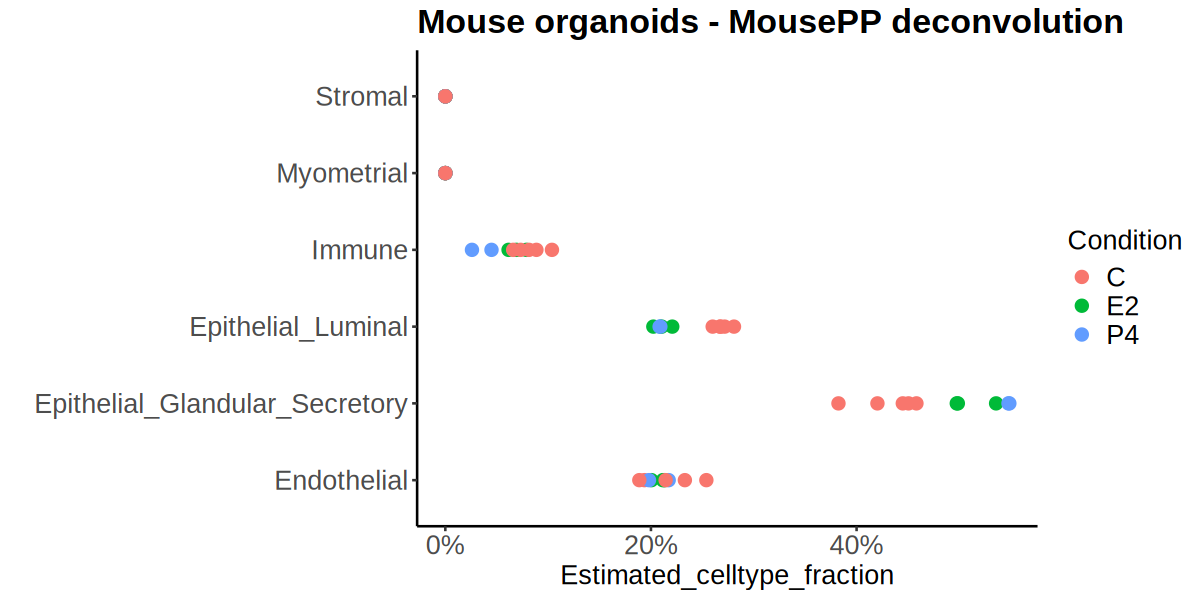

In [22]:
options(repr.plot.width=10, repr.plot.height=5)

## Plot by cell type

ggplot(DWLS_long, aes(x = Estimated_celltype_fraction, y = Celltypes, color = Condition))  +
      geom_point(size = 3) +
      scale_x_continuous(labels = scales::percent) +
      labs(y="") + 
      theme_classic(base_size = 12) +
    theme(plot.title = element_text(size = 20, face = "bold"), 
          axis.title = element_text(size = 16),
          axis.text =  element_text(size = 16),
          legend.text = element_text(size = 16),
          legend.title = element_text(size = 16)
                 ) +
    ggtitle("Mouse organoids - MousePP deconvolution")


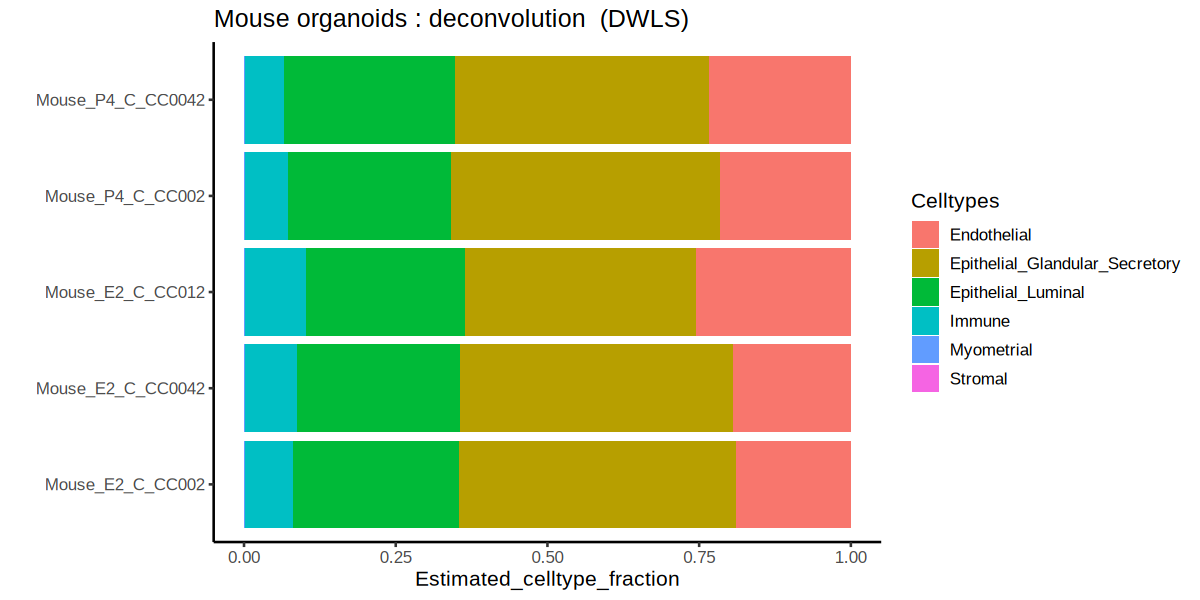

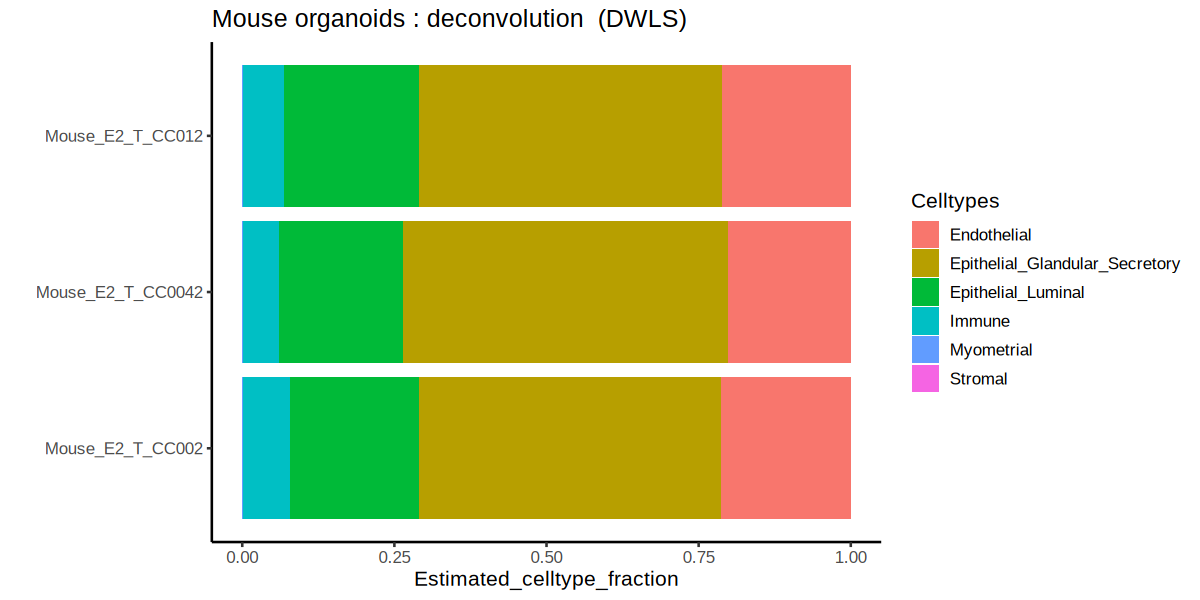

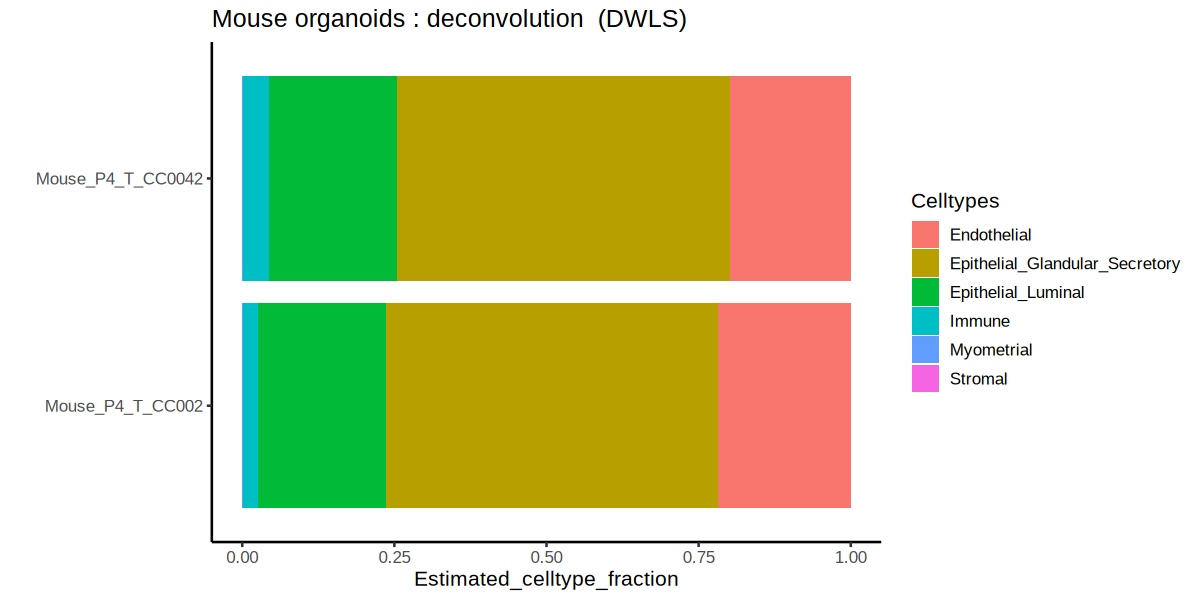

In [188]:
## Barplot per organoid

ggplot(DWLS_long %>% filter(Condition == "C"), aes(x = Estimated_celltype_fraction, y = LongName, fill = Celltypes)) +
    geom_bar(position="stack", stat="identity") +
    labs(y="") + 
      theme_classic(base_size = 12) +
    ggtitle("Mouse organoids : deconvolution  (DWLS)")

ggplot(DWLS_long %>% filter(Condition == "E2"), aes(x = Estimated_celltype_fraction, y = LongName, fill = Celltypes)) +
    geom_bar(position="stack", stat="identity") +
    labs(y="") + 
      theme_classic(base_size = 12) +
    ggtitle("Mouse organoids : deconvolution  (DWLS)")

ggplot(DWLS_long %>% filter(Condition == "P4"), aes(x = Estimated_celltype_fraction, y = LongName, fill = Celltypes)) +
    geom_bar(position="stack", stat="identity") +
    labs(y="") + 
      theme_classic(base_size = 12) +
    ggtitle("Mouse organoids : deconvolution  (DWLS)")

# Deconvolution of the Mouse with Human sn RNAseq

## Step 1 : Preparation of deconvoluted sn marker table

In [4]:
## Read the signature file for Human endoemtriun
species = "Human"
load(paste0("../../../results/snRNA-seq/DWLS_", species,"/DWLS_", species,".RData"))

In [5]:
head(Signature)

SOX9_functional_basal dStromal   eStromal   Epithelial_MUC5B
AC024084.1 0.7781227             0.01830230 0.06926101 0.01283915      
KMO        1.2287919             0.05605953 0.22590091 0.02202896      
LINC02814  1.4655983             0.13528211 0.13647951 0.36843931      
AC078845.1 1.1024451             0.06375251 0.19961558 0.02459325      
CNTN5      1.5927252             0.14438764 0.11114270 0.03958386      
LINC02523  0.5978341             0.01118240 0.01342504 0.00471733      
           Epithelial_Cycling Immune_Lymphoid eStromal_cycling Immune_Myeloid
AC024084.1 0.6794569          0.12445781      0.06956871       0.19223706    
KMO        0.7508894          0.12814899      0.25134875       0.46346518    
LINC02814  1.1989231          0.15424784      0.12879807       0.17165157    
AC078845.1 0.9469471          0.23485159      0.18737995       0.27803414    
CNTN5      1.3515298          0.27442574      0.12465595       0.21521653    
LINC02523  0.6552117          0.04436438      0.01416109       0.04583754    
           Epithelial_Luminal Endothelial Glandular_secretory
AC024084.1 0.1883362          0.06440940  0.07094808         
KMO        0.2730145          0.15483010  0.13188134         
LINC02814  0.7029384          0.16238595  1.09879196         
AC078845.1 0.3273141          0.15635993  0.13930671         
CNTN5      1.6023891          0.16649460  1.21108490         
LINC02523  0.5529269          0.03000931  0.07601162         
           Epithelial_Ciliated eStromal_MMPs ePV       
AC024084.1 0.2482954           0.022267572   0.04169437
KMO        0.4401116           0.043581403   0.19065552
LINC02814  0.7013016           0.027021013   0.10739031
AC078845.1 0.4232704           0.047603945   0.14949034
CNTN5      0.7043499           0.065360858   0.12604070
LINC02523  0.3439166           0.004268684   0.01489540

In [7]:
Gene_annotation = fread("../../../data/One2one_orthologues_HumanMouseMacaque.txt")
head(Gene_annotation)
species= "Mouse"

### Add col for GeneID
Signature_ENSID = Signature %>% as.data.frame() %>% mutate("Human_genename" = row.names(Signature))

### Add col for ENSID
Signature_ENSID = left_join(Signature_ENSID, Gene_annotation, by = "Human_genename")
nrow(Signature_ENSID)
### Select only orthologs
Signature_ENSID = Signature_ENSID %>% filter(`Mouse_geneID` != "NA")
nrow(Signature_ENSID)

### Change rownames to ENSID
row.names(Signature_ENSID) = Signature_ENSID$Mouse_geneID
Signature_ENSID = Signature_ENSID %>% select(-"Human_genename", -"Human_geneID", -"Mouse_geneID", -"Mouse_genename",-"Macaque_geneID",-"Macaque_genename"  )
head(Signature_ENSID)

### Remove epithelial MUC5B cells as they come from cervical epithelium 
Signature_ENSID = Signature_ENSID %>% select(-Epithelial_MUC5B)

### Save this signature with ENSID
write.table(Signature_ENSID, file = paste0("../../../results/snRNA-seq/DWLS_", species,"/DWLS_Humansn_Signature_", species,".tsv"))
Signature_ENSID = as.matrix(Signature_ENSID)

Human_geneID    Human_genename Mouse_geneID       Mouse_genename
1 ENSG00000198763 MT-ND2         ENSMUSG00000064345 mt-Nd2        
2 ENSG00000198804 MT-CO1         ENSMUSG00000064351 mt-Co1        
3 ENSG00000198712 MT-CO2         ENSMUSG00000064354 mt-Co2        
4 ENSG00000228253 MT-ATP8        ENSMUSG00000064356 mt-Atp8       
5 ENSG00000198899 MT-ATP6        ENSMUSG00000064357 mt-Atp6       
6 ENSG00000198938 MT-CO3         ENSMUSG00000064358 mt-Co3        
  Macaque_geneID     Macaque_genename
1 ENSMFAG00000050431 ND2             
2 ENSMFAG00000060073 COX1            
3 ENSMFAG00000055785 COX2            
4 ENSMFAG00000048226 ATP8            
5 ENSMFAG00000053176 ATP6            
6 ENSMFAG00000060632 COX3

[1] 672

[1] 474

SOX9_functional_basal dStromal   eStromal  Epithelial_MUC5B
ENSMUSG00000039783 1.2287919             0.05605953 0.2259009 0.02202896      
ENSMUSG00000039488 1.5927252             0.14438764 0.1111427 0.03958386      
ENSMUSG00000040732 0.9865463             0.03442984 0.1201486 0.33957442      
ENSMUSG00000059173 0.7998096             0.04323011 0.1185284 0.21489572      
ENSMUSG00000021719 0.7774420             0.14429950 0.1150946 0.48629386      
ENSMUSG00000029757 0.8989668             0.07686004 0.1102610 0.16493190      
                   Epithelial_Cycling Immune_Lymphoid eStromal_cycling
ENSMUSG00000039783 0.7508894          0.12814899      0.2513488       
ENSMUSG00000039488 1.3515298          0.27442574      0.1246559       
ENSMUSG00000040732 0.8748155          0.11520565      0.1156842       
ENSMUSG00000059173 0.5313568          0.09919751      0.1184197       
ENSMUSG00000021719 0.6092876          0.07073196      0.1706824       
ENSMUSG00000029757 0.9793534          0.12049275      0.1154995       
                   Immune_Myeloid Epithelial_Luminal Endothelial
ENSMUSG00000039783 0.4634652      0.2730145          0.15483010 
ENSMUSG00000039488 0.2152165      1.6023891          0.16649460 
ENSMUSG00000040732 0.1356678      0.1262767          1.49527030 
ENSMUSG00000059173 0.1150765      0.2378994          0.24430419 
ENSMUSG00000021719 0.1141622      0.2842466          0.06163138 
ENSMUSG00000029757 0.1507543      0.6439681          0.19894093 
                   Glandular_secretory Epithelial_Ciliated eStromal_MMPs
ENSMUSG00000039783 0.13188134          0.4401116           0.04358140   
ENSMUSG00000039488 1.21108490          0.7043499           0.06536086   
ENSMUSG00000040732 0.19279242          0.2931681           0.15793309   
ENSMUSG00000059173 0.14793540          0.3026087           0.07634316   
ENSMUSG00000021719 0.06410913          0.2440322           0.02283641   
ENSMUSG00000029757 0.33411767          0.4707158           0.05937859   
                   ePV      
ENSMUSG00000039783 0.1906555
ENSMUSG00000039488 0.1260407
ENSMUSG00000040732 0.1263872
ENSMUSG00000059173 0.7703495
ENSMUSG00000021719 0.3333798
ENSMUSG00000029757 0.1840523

## Step 2 : Bulk RNAseq data 

The bulk RNA seq data must have Gene names or ENS ID matching the genes ID from the single-nuclei data. 
Data must be normalised before using it for deconvolution (CPM - or other normalisation). 

Here we use RPKM normalised data

In [8]:
species = "Mouse"

COUNTS = read.csv(paste0("../../../results/RNA-seq/countmatrix_normalised/", species,"_organoid_countmatrix_batchCorrected_logRPKM.tsv"),header=T,sep = "\t",row.names=1)

In [9]:
### filters your counts for genes maintained in the Signature Matrix
nrow(COUNTS)
COUNTS.trim = COUNTS[rownames(Signature_ENSID),] 
nrow(COUNTS.trim)
COUNTS.trim = as.matrix(COUNTS.trim)
## 

[1] 35667

[1] 474

In [10]:
### grabbing a vector of your subject names
samples = colnames(COUNTS.trim)
samples

[1] "CC012.R.E2.T"  "CCO12.R.E2.C"  "cc0042.R.E2.T" "cc0042.R.E2.C"
 [5] "cc0042.R.P4.T" "cc0042.R.P4.C" "CCOO2.R.E2.T"  "CCOO2.R.E2.C" 
 [9] "CCOO2.R.P4.T"  "CCOO2.R.P4.C"

In [13]:
### Initializing Results Data Frames for Each Algorithm that DWLS employs (DWLS being the superstar)
DWLS = data.frame()
SVR = data.frame()
OLS = data.frame()
### Computing Cell Fractions for Each Sample and Adding to Results Data Frames
for(sample in samples){
        bulk = COUNTS.trim[,sample]
        names(bulk) = rownames(COUNTS.trim)
        tr = trimData(Signature_ENSID,bulk)
        solDWLS = solveDampenedWLS(tr$sig,tr$bulk)
        solSVR = solveSVR(tr$sig,tr$bulk)
        solOLS = solveOLS(tr$sig,tr$bulk)
        DWLS = rbind(DWLS,solDWLS)
        SVR = rbind(SVR,solSVR)
        OLS = rbind(OLS,solOLS)
}
# Adding the rownames and columns back to each dataframe in list

colnames(DWLS) = colnames(Signature_ENSID)
rownames(DWLS) = samples
head(DWLS)



SOX9_functional_basal              dStromal              eStromal 
              0.00000               0.00000               0.00000 
   Epithelial_Cycling       Immune_Lymphoid      eStromal_cycling 
              0.36087               0.00710               0.00000 
       Immune_Myeloid    Epithelial_Luminal           Endothelial 
              0.05422               0.13931               0.02178 
  Glandular_secretory   Epithelial_Ciliated         eStromal_MMPs 
              0.24273               0.00006               0.17393 
                  ePV 
              0.00000 
SOX9_functional_basal              dStromal              eStromal 
              0.00000               0.00000               0.00000 
   Epithelial_Cycling       Immune_Lymphoid      eStromal_cycling 
              0.55075               0.00000               0.12230 
       Immune_Myeloid    Epithelial_Luminal           Endothelial 
              0.00000               0.00000               0.00000 
  Glandular_secr

SOX9_functional_basal dStromal      eStromal     
CC012.R.E2.T  -2.600944e-17         -4.136970e-19 -1.391369e-18
CCO12.R.E2.C   4.361049e-08         -2.117035e-19  7.150894e-18
cc0042.R.E2.T -1.964285e-17          6.202558e-19  2.589741e-18
cc0042.R.E2.C  2.210255e-06         -3.433112e-19  5.133805e-19
cc0042.R.P4.T -2.860303e-19          7.824727e-19 -4.712960e-20
cc0042.R.P4.C  5.104010e-06          8.855806e-19  1.801577e-17
              Epithelial_Cycling Immune_Lymphoid eStromal_cycling
CC012.R.E2.T  0.3608717          7.100698e-03    -2.516568e-18   
CCO12.R.E2.C  0.2377705          1.369325e-08     4.271156e-18   
cc0042.R.E2.T 0.4017336          1.347300e-03     2.924134e-18   
cc0042.R.E2.C 0.2511651          1.315423e-02     3.833081e-18   
cc0042.R.P4.T 0.2386666          9.307916e-03    -1.696354e-18   
cc0042.R.P4.C 0.1278737          7.629053e-06    -2.182730e-18   
              Immune_Myeloid Epithelial_Luminal Endothelial Glandular_secretory
CC012.R.E2.T  0.05421801     0.13931290         0.02178373  0.24272693         
CCO12.R.E2.C  0.10383820     0.46417979         0.02569089  0.05430694         
cc0042.R.E2.T 0.03956936     0.09798048         0.02573629  0.24407702         
cc0042.R.E2.C 0.11681802     0.35426784         0.03141376  0.09961856         
cc0042.R.P4.T 0.05760856     0.19918277         0.04643101  0.24986469         
cc0042.R.P4.C 0.12324230     0.46576409         0.03463105  0.07709339         
              Epithelial_Ciliated eStromal_MMPs ePV         
CC012.R.E2.T  5.549913e-05        0.1739306     3.444427e-19
CCO12.R.E2.C  6.136704e-03        0.1071224     9.545096e-04
cc0042.R.E2.T 7.114343e-04        0.1888445     2.876875e-18
cc0042.R.E2.C 1.126386e-02        0.1222965     2.330392e-09
cc0042.R.P4.T 2.170537e-03        0.1967679     2.845935e-20
cc0042.R.P4.C 4.613094e-03        0.1579984     8.771316e-03

## Deconvolution results 

In [14]:
DWLS = DWLS %>% mutate(SampleWName = rownames(DWLS))

head(DWLS)

SOX9_functional_basal dStromal      eStromal     
CC012.R.E2.T  -2.600944e-17         -4.136970e-19 -1.391369e-18
CCO12.R.E2.C   4.361049e-08         -2.117035e-19  7.150894e-18
cc0042.R.E2.T -1.964285e-17          6.202558e-19  2.589741e-18
cc0042.R.E2.C  2.210255e-06         -3.433112e-19  5.133805e-19
cc0042.R.P4.T -2.860303e-19          7.824727e-19 -4.712960e-20
cc0042.R.P4.C  5.104010e-06          8.855806e-19  1.801577e-17
              Epithelial_Cycling Immune_Lymphoid eStromal_cycling
CC012.R.E2.T  0.3608717          7.100698e-03    -2.516568e-18   
CCO12.R.E2.C  0.2377705          1.369325e-08     4.271156e-18   
cc0042.R.E2.T 0.4017336          1.347300e-03     2.924134e-18   
cc0042.R.E2.C 0.2511651          1.315423e-02     3.833081e-18   
cc0042.R.P4.T 0.2386666          9.307916e-03    -1.696354e-18   
cc0042.R.P4.C 0.1278737          7.629053e-06    -2.182730e-18   
              Immune_Myeloid Epithelial_Luminal Endothelial Glandular_secretory
CC012.R.E2.T  0.05421801     0.13931290         0.02178373  0.24272693         
CCO12.R.E2.C  0.10383820     0.46417979         0.02569089  0.05430694         
cc0042.R.E2.T 0.03956936     0.09798048         0.02573629  0.24407702         
cc0042.R.E2.C 0.11681802     0.35426784         0.03141376  0.09961856         
cc0042.R.P4.T 0.05760856     0.19918277         0.04643101  0.24986469         
cc0042.R.P4.C 0.12324230     0.46576409         0.03463105  0.07709339         
              Epithelial_Ciliated eStromal_MMPs ePV          SampleWName  
CC012.R.E2.T  5.549913e-05        0.1739306     3.444427e-19 CC012.R.E2.T 
CCO12.R.E2.C  6.136704e-03        0.1071224     9.545096e-04 CCO12.R.E2.C 
cc0042.R.E2.T 7.114343e-04        0.1888445     2.876875e-18 cc0042.R.E2.T
cc0042.R.E2.C 1.126386e-02        0.1222965     2.330392e-09 cc0042.R.E2.C
cc0042.R.P4.T 2.170537e-03        0.1967679     2.845935e-20 cc0042.R.P4.T
cc0042.R.P4.C 4.613094e-03        0.1579984     8.771316e-03 cc0042.R.P4.C

In [15]:
## Add metadata to bulk estimates 
metadata = fread("../../../config/samplesheet.tsv")
head(metadata)
# ## Merge with deconvolution results 
DWLS_md = left_join(DWLS, metadata, by ="SampleWName")
head(DWLS_md)

SampleLabel  Species Hormone Treatment Condition Replicat LongName        
1 A1H7.H.E2.C  Human   E2      Control   C         Rep1     Human_E2_C_A1H7 
2 A7H8.H.E2.C  Human   E2      Control   C         Rep2     Human_E2_C_A7H8 
3 B1H8.H.E2.C  Human   E2      Control   C         Rep3     Human_E2_C_B1H8 
4 ws520.H.E2.C Human   E2      Control   C         Rep4     Human_E2_C_ws520
5 ws522.H.E2.C Human   E2      Control   C         Rep5     Human_E2_C_ws522
6 ws528.H.E2.C Human   E2      Control   C         Rep6     Human_E2_C_ws528
  ShortName SampleWName 
1 H_C_1     A1H7.H.E2.C 
2 H_C_2     A7H8.H.E2.C 
3 H_C_3     B1H8.H.E2.C 
4 H_C_4     ws520.H.E2.C
5 H_C_5     ws522.H.E2.C
6 H_C_6     ws528.H.E2.C

SOX9_functional_basal dStromal      eStromal      Epithelial_Cycling
1 -2.600944e-17         -4.136970e-19 -1.391369e-18 0.3608717         
2  4.361049e-08         -2.117035e-19  7.150894e-18 0.2377705         
3 -1.964285e-17          6.202558e-19  2.589741e-18 0.4017336         
4  2.210255e-06         -3.433112e-19  5.133805e-19 0.2511651         
5 -2.860303e-19          7.824727e-19 -4.712960e-20 0.2386666         
6  5.104010e-06          8.855806e-19  1.801577e-17 0.1278737         
  Immune_Lymphoid eStromal_cycling Immune_Myeloid Epithelial_Luminal
1 7.100698e-03    -2.516568e-18    0.05421801     0.13931290        
2 1.369325e-08     4.271156e-18    0.10383820     0.46417979        
3 1.347300e-03     2.924134e-18    0.03956936     0.09798048        
4 1.315423e-02     3.833081e-18    0.11681802     0.35426784        
5 9.307916e-03    -1.696354e-18    0.05760856     0.19918277        
6 7.629053e-06    -2.182730e-18    0.12324230     0.46576409        
  Endothelial Glandular_secretory ⋯ ePV          SampleWName   SampleLabel  
1 0.02178373  0.24272693          ⋯ 3.444427e-19 CC012.R.E2.T  CC012.R.E2.T 
2 0.02569089  0.05430694          ⋯ 9.545096e-04 CCO12.R.E2.C  CC012.R.E2.C 
3 0.02573629  0.24407702          ⋯ 2.876875e-18 cc0042.R.E2.T CC0042.R.E2.T
4 0.03141376  0.09961856          ⋯ 2.330392e-09 cc0042.R.E2.C CC0042.R.E2.C
5 0.04643101  0.24986469          ⋯ 2.845935e-20 cc0042.R.P4.T CC0042.R.P4.T
6 0.03463105  0.07709339          ⋯ 8.771316e-03 cc0042.R.P4.C CC0042.R.P4.C
  Species Hormone Treatment Condition Replicat LongName          ShortName
1 Mouse   E2      Treatment E2        Rep1     Mouse_E2_T_CC012  R_E2_1   
2 Mouse   E2      Control   C         Rep1     Mouse_E2_C_CC012  R_C_1    
3 Mouse   E2      Treatment E2        Rep2     Mouse_E2_T_CC0042 R_E2_2   
4 Mouse   E2      Control   C         Rep2     Mouse_E2_C_CC0042 R_C_2    
5 Mouse   P4      Treatment P4        Rep1     Mouse_P4_T_CC0042 R_P4_1   
6 Mouse   P4      Control   C         Rep1     Mouse_P4_C_CC0042 R_C_4

In [18]:
## Fraction of endometrial cells predicted in bulk organoids
celltypes = c('SOX9_functional_basal','dStromal','eStromal','Epithelial_Cycling','Immune_Lymphoid','eStromal_cycling','Immune_Myeloid','Epithelial_Luminal','Endothelial','Glandular_secretory','Epithelial_Ciliated','eStromal_MMPs','ePV')
DWLS_long = DWLS_md %>% pivot_longer(cols = celltypes, names_to = "Celltypes", values_to = "Estimated_celltype_fraction")
head(DWLS_long)
write.table(x = DWLS_long, file = paste0("../../../results/snRNA-seq/DWLS_",species,"/DWLS_", species, "Organoids_deconvolution_with_Humansn.tsv"), sep = "\t", row.names = F, quote = F)

SampleWName  SampleLabel  Species Hormone Treatment Condition Replicat
1 CC012.R.E2.T CC012.R.E2.T Mouse   E2      Treatment E2        Rep1    
2 CC012.R.E2.T CC012.R.E2.T Mouse   E2      Treatment E2        Rep1    
3 CC012.R.E2.T CC012.R.E2.T Mouse   E2      Treatment E2        Rep1    
4 CC012.R.E2.T CC012.R.E2.T Mouse   E2      Treatment E2        Rep1    
5 CC012.R.E2.T CC012.R.E2.T Mouse   E2      Treatment E2        Rep1    
6 CC012.R.E2.T CC012.R.E2.T Mouse   E2      Treatment E2        Rep1    
  LongName         ShortName Celltypes             Estimated_celltype_fraction
1 Mouse_E2_T_CC012 R_E2_1    SOX9_functional_basal -2.600944e-17              
2 Mouse_E2_T_CC012 R_E2_1    dStromal              -4.136970e-19              
3 Mouse_E2_T_CC012 R_E2_1    eStromal              -1.391369e-18              
4 Mouse_E2_T_CC012 R_E2_1    Epithelial_Cycling     3.608717e-01              
5 Mouse_E2_T_CC012 R_E2_1    Immune_Lymphoid        7.100698e-03              
6 Mouse_E2_T_CC012 R_E2_1    eStromal_cycling      -2.516568e-18

## Results deconvolution

In [37]:
DWLS_long = fread(input =  paste0("../../../results/snRNA-seq/DWLS_",species,"/DWLS_", species, "Organoids_deconvolution_with_Humansn.tsv"), sep = "\t")

## Order by % of cell types / and by Epithelial VS other celltypes
celltype_order = rev(c('Epithelial_Cycling','Epithelial_Luminal','Glandular_secretory','Epithelial_Ciliated', 'SOX9_functional_basal','dStromal','eStromal','eStromal_MMPs','eStromal_cycling','ePV','Endothelial','Immune_Lymphoid','Immune_Myeloid'))

DWLS_long$Celltypes = factor(DWLS_long$Celltypes, levels= celltype_order)


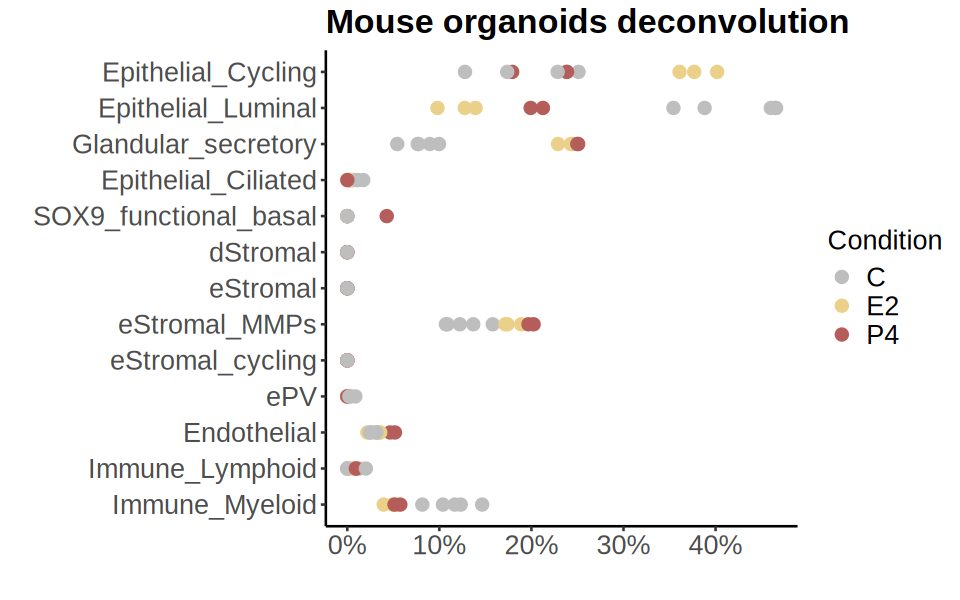

In [39]:
options(repr.plot.width=8, repr.plot.height=5)

## Plot by cell type

ggplot(DWLS_long, aes(x = Estimated_celltype_fraction, y = Celltypes, color = Condition))  +
      geom_point(size = 3) +
      scale_x_continuous(labels = scales::percent) +
      scale_color_manual(values = c("grey","#ebd08a","#b55d5a")) +
      labs(y="", x="") + 
      theme_classic(base_size = 12) +
    theme(plot.title = element_text(size = 20, face = "bold"), 
          axis.title = element_text(size = 16),
          axis.text =  element_text(size = 16),
          legend.text = element_text(size = 16),
          legend.title = element_text(size = 16)
                 ) +
    ggtitle("Mouse organoids deconvolution")


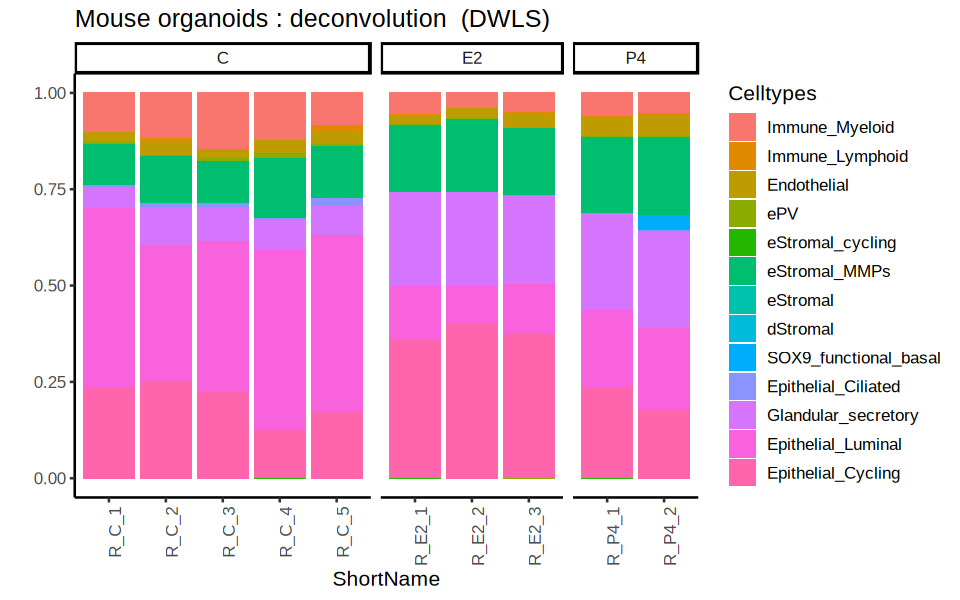

In [46]:
options(repr.plot.width=8, repr.plot.height=5)

## Plot barplor
ggplot(DWLS_long, aes(x =ShortName , y = Estimated_celltype_fraction, fill = Celltypes)) +
    geom_bar(position="stack", stat="identity") +
    labs(y="") + 
    theme_classic(base_size = 12) + theme(axis.text.x = element_text(angle = 90)) +
    ggtitle("Mouse organoids : deconvolution  (DWLS)") +
        facet_nested(~Condition, scales = "free", space = "free")


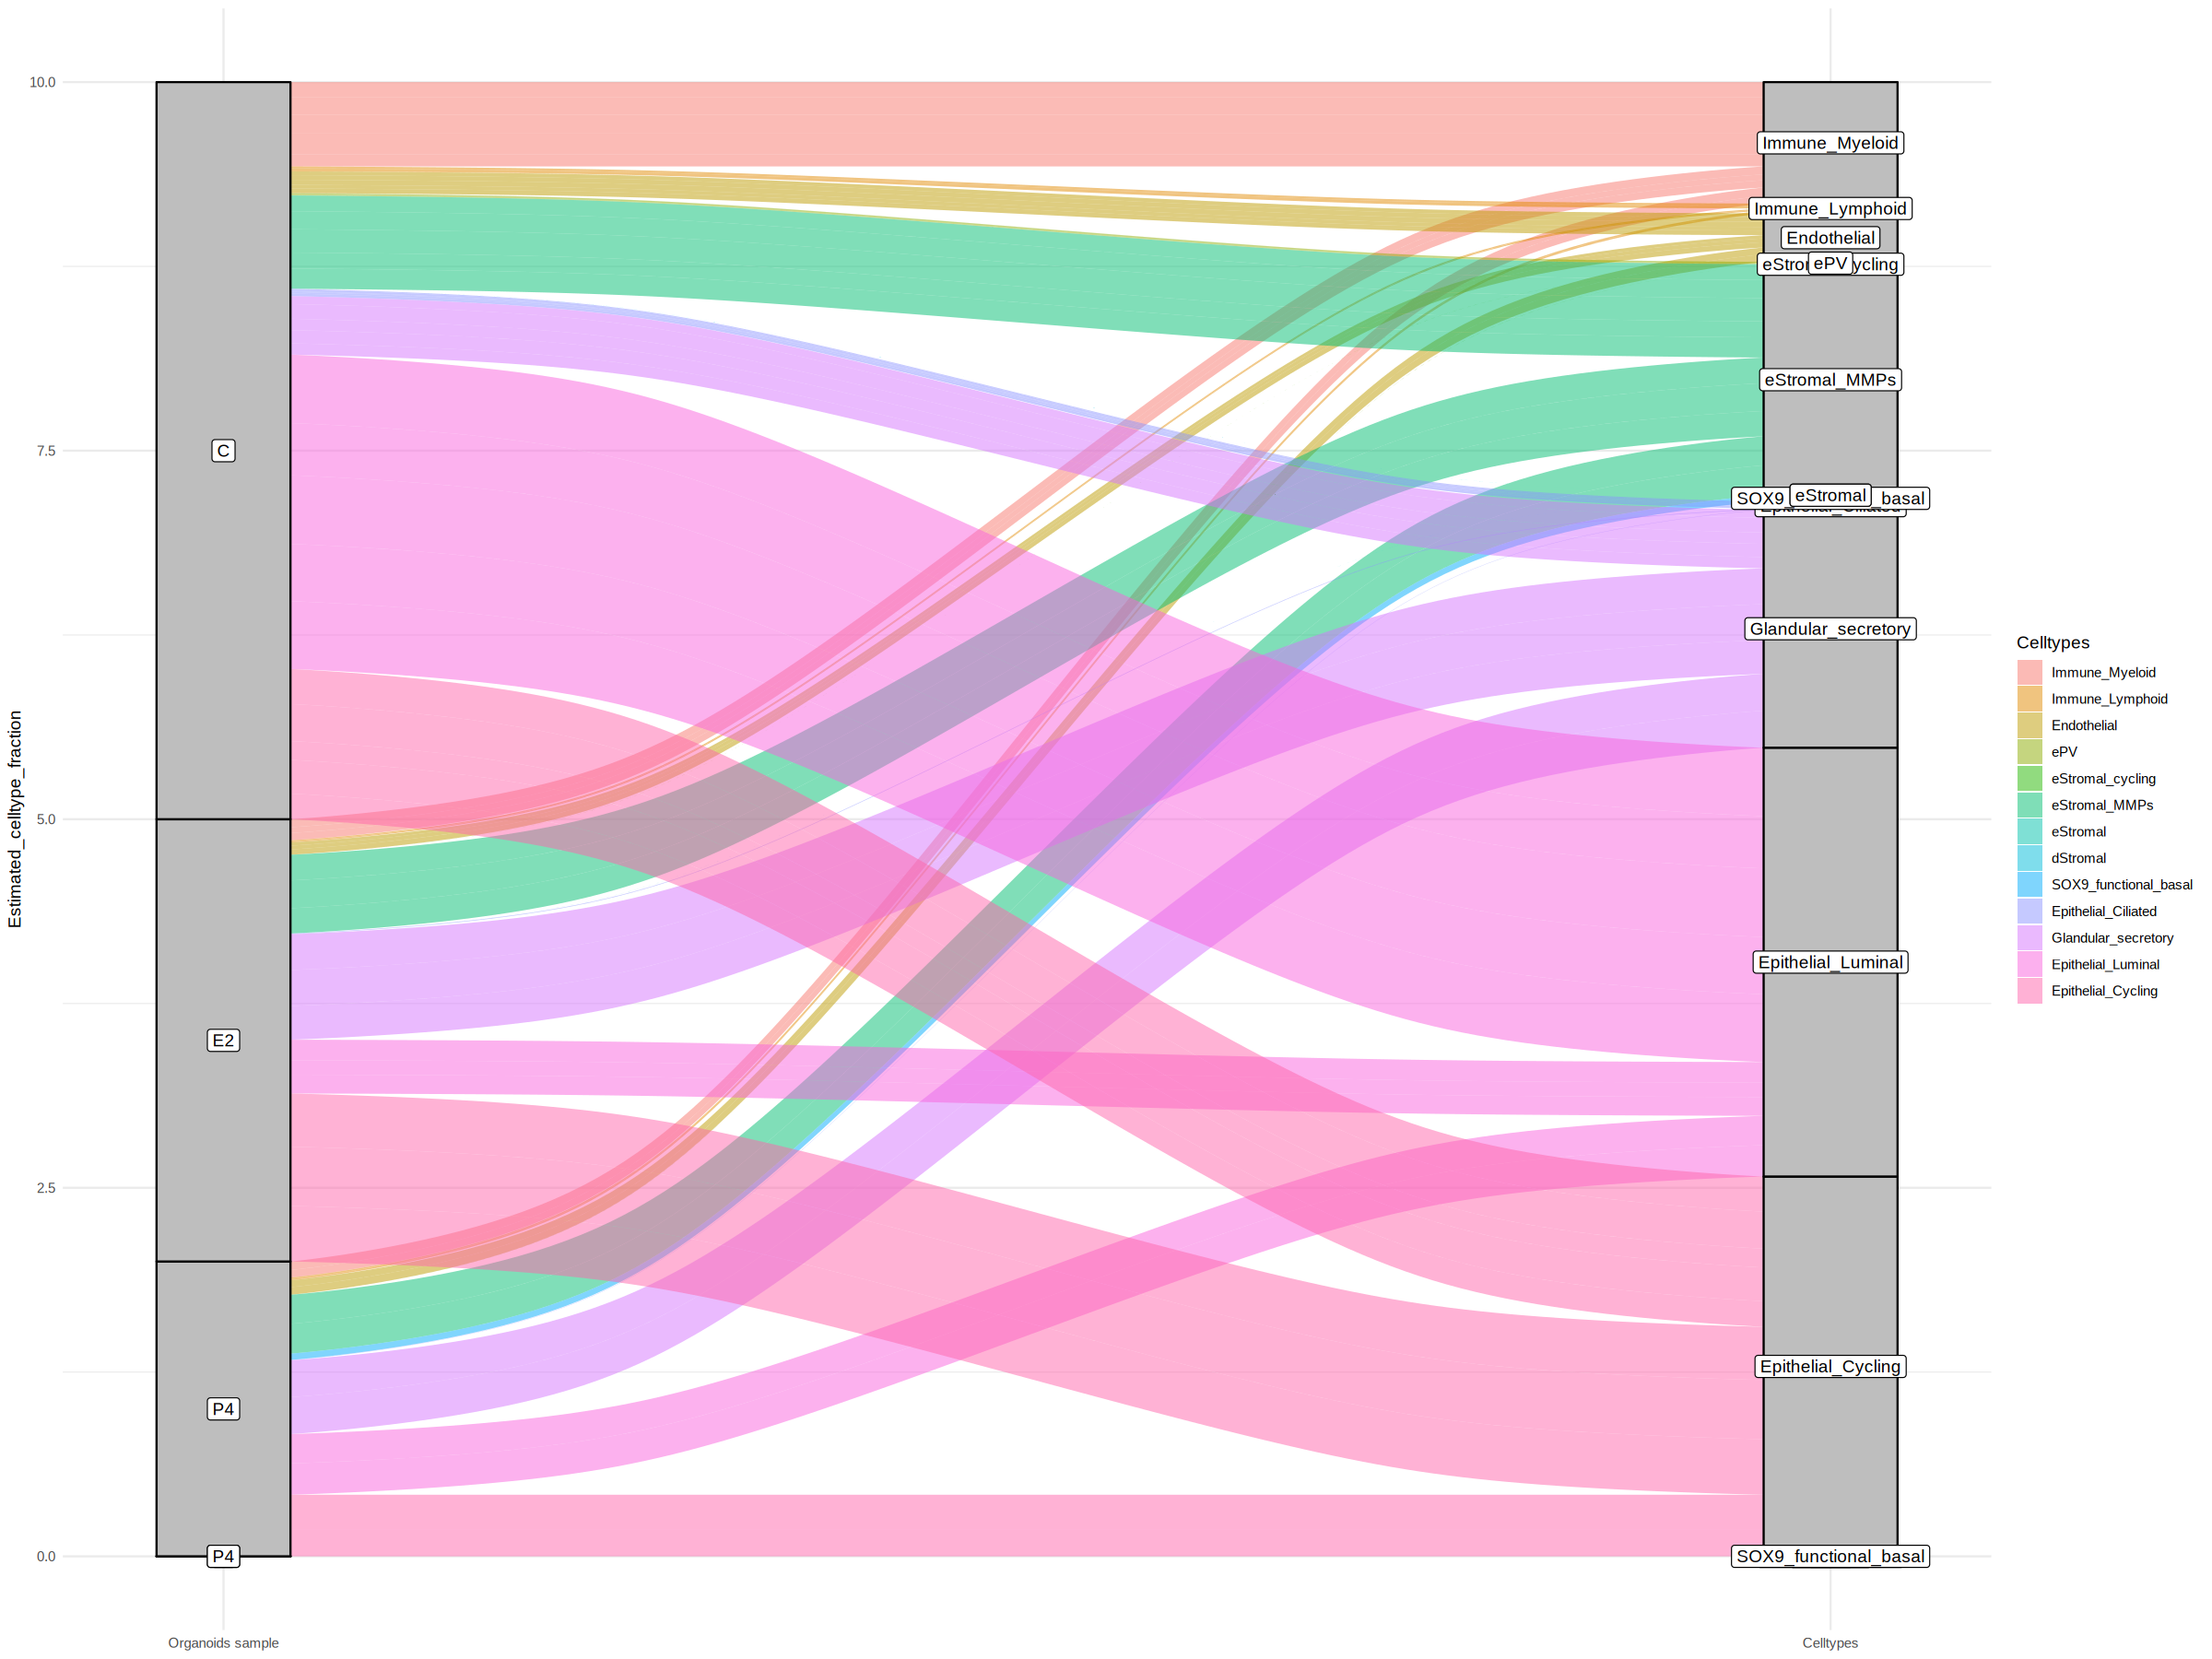

In [47]:
options(repr.plot.width=20, repr.plot.height=15)

ggplot(as.data.frame(DWLS_long),
       aes(y= Estimated_celltype_fraction, axis1 = Condition,, axis2=Celltypes)) +
  geom_alluvium(aes(fill = Celltypes), width = 1/12) +
  geom_stratum(width = 1/12, fill = "grey", color = "black") +
  geom_label(stat = "stratum", aes(label = after_stat(stratum))) +
  scale_x_discrete(limits = c("Organoids sample", "Celltypes"), expand = c(.05, .05)) +
theme_minimal() 
#   scale_fill_brewer(type = "qual", palette = "Set2")

SampleWName  SampleLabel  Species Hormone Treatment Condition Replicat
1 CC012.R.E2.T CC012.R.E2.T Mouse   E2      Treatment E2        Rep1    
2 CC012.R.E2.T CC012.R.E2.T Mouse   E2      Treatment E2        Rep1    
3 CC012.R.E2.T CC012.R.E2.T Mouse   E2      Treatment E2        Rep1    
4 CC012.R.E2.T CC012.R.E2.T Mouse   E2      Treatment E2        Rep1    
5 CC012.R.E2.T CC012.R.E2.T Mouse   E2      Treatment E2        Rep1    
6 CC012.R.E2.T CC012.R.E2.T Mouse   E2      Treatment E2        Rep1    
  LongName         ShortName Celltypes             Estimated_celltype_fraction
1 Mouse_E2_T_CC012 R_E2_1    SOX9_functional_basal -2.600944e-17              
2 Mouse_E2_T_CC012 R_E2_1    dStromal              -4.136970e-19              
3 Mouse_E2_T_CC012 R_E2_1    eStromal              -1.391369e-18              
4 Mouse_E2_T_CC012 R_E2_1    Epithelial_Cycling     3.608717e-01              
5 Mouse_E2_T_CC012 R_E2_1    Immune_Lymphoid        7.100698e-03              
6 Mouse_E2_T_CC012 R_E2_1    eStromal_cycling      -2.516568e-18

`summarise()` has grouped output by 'Condition'. You can override using the
`.groups` argument.


Condition Celltypes        Estimated_celltype_fraction_mean
1 C         Immune_Myeloid   1.143783e-01                    
2 C         Immune_Lymphoid  6.703815e-03                    
3 C         Endothelial      2.956538e-02                    
4 C         ePV              3.079786e-03                    
5 C         eStromal_cycling 3.580165e-18                    
6 C         eStromal_MMPs    1.266045e-01

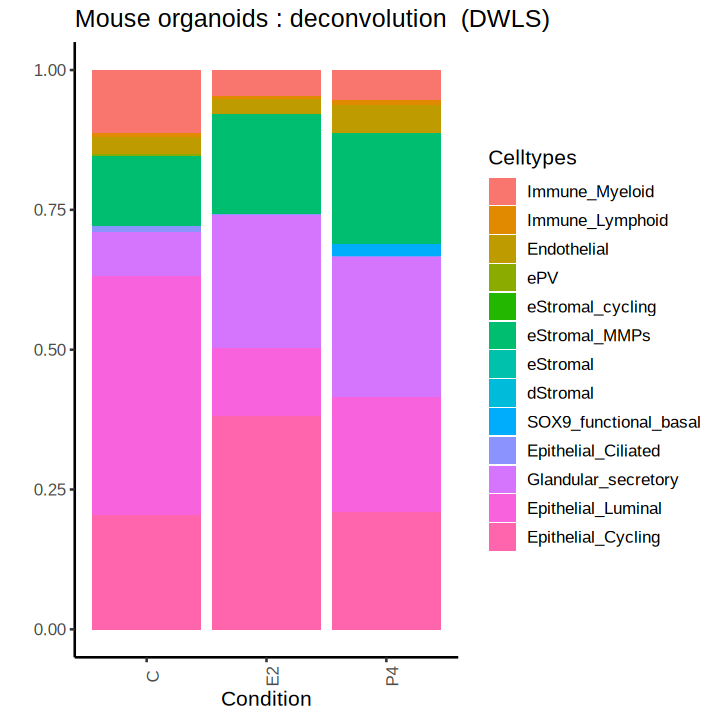

In [42]:
options(repr.plot.width=6, repr.plot.height=6)

## Spred cell types by conditions 
head(DWLS_long)
DWLS_verylong = DWLS_long %>% select(Condition,Species,Replicat, Celltypes, Estimated_celltype_fraction) %>% 
    group_by(Condition, Celltypes) %>% summarize(Estimated_celltype_fraction_mean = mean(Estimated_celltype_fraction)) 
#     pivot_wider(names_from = Condition, values_from = Estimated_celltype_fraction_mean)
head(DWLS_verylong)

## Plot barplor
ggplot(DWLS_verylong, aes(x =Condition , y = Estimated_celltype_fraction_mean, fill = Celltypes)) +
    geom_bar(position="stack", stat="identity") +
    labs(y="") + 
    theme_classic(base_size = 12) + theme(axis.text.x = element_text(angle = 90)) +
    ggtitle("Mouse organoids : deconvolution  (DWLS)")


In [163]:
sessionInfo()

R version 4.3.0 (2023-04-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.8 (Ootpa)

Matrix products: default
BLAS/LAPACK: /opt/gensoft/lib/OpenBLAS/0.3.21/lib/libopenblas_zenp-r0.3.21.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Paris
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.3       forcats_1.0.0         readr_2.1.5          
 [4] tidyr_1.3.1           tibble_3.2.1          tidyverse_2.0.0      
 [7] edgeR_4.0.16          limma_3.58.1          Seurat_5.0.1       